# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy.stats import pearsonr, linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import datetime

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_city_url = (f"{url}appid={weather_api_key}&units={units}&q=+{city}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | flin flon
Processing Record 4 of Set 1 | kanoya
Processing Record 5 of Set 1 | san matias
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | palmer
Processing Record 13 of Set 1 | villa nueva
Processing Record 14 of Set 1 | tepatitlan de morelos
Processing Record 15 of Set 1 | tadine
Processing Record 16 of Set 1 | sete
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | christchurch
Processing Record 23 o

Processing Record 36 of Set 4 | kannus
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | gadzhiyevo
Processing Record 39 of Set 4 | ebon
Processing Record 40 of Set 4 | hadibu
City not found. Skipping...
Processing Record 41 of Set 4 | vorkuta
Processing Record 42 of Set 4 | saint-francois
Processing Record 43 of Set 4 | ta`u
City not found. Skipping...
Processing Record 44 of Set 4 | alicante
Processing Record 45 of Set 4 | boguchany
Processing Record 46 of Set 4 | halden
Processing Record 47 of Set 4 | altai
Processing Record 48 of Set 4 | pocone
Processing Record 49 of Set 4 | xilin hot
Processing Record 0 of Set 5 | whitehorse
Processing Record 1 of Set 5 | opatow
Processing Record 2 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 5 | haiku-pauwela
Processing Record 4 of Set 5 | barah
Processing Record 5 of Set 5 | val-d'or
City not found. Skipping...
Processing Record 6 of Set 5 | itaituba
Processing Record 7 of Set 5 | visby


Processing Record 10 of Set 8 | gorokhovets
Processing Record 11 of Set 8 | tongren
Processing Record 12 of Set 8 | effingham
Processing Record 13 of Set 8 | guerrero negro
Processing Record 14 of Set 8 | pursat
Processing Record 15 of Set 8 | corinto
Processing Record 16 of Set 8 | lodja
Processing Record 17 of Set 8 | alesund
Processing Record 18 of Set 8 | batu pahat
Processing Record 19 of Set 8 | qujing
Processing Record 20 of Set 8 | daru
Processing Record 21 of Set 8 | bijie
Processing Record 22 of Set 8 | margate
Processing Record 23 of Set 8 | jacmel
Processing Record 24 of Set 8 | port blair
Processing Record 25 of Set 8 | puri
Processing Record 26 of Set 8 | kayangel
Processing Record 27 of Set 8 | recani
City not found. Skipping...
Processing Record 28 of Set 8 | asau
Processing Record 29 of Set 8 | sitka
Processing Record 30 of Set 8 | kirakira
Processing Record 31 of Set 8 | mejit
Processing Record 32 of Set 8 | whakatane
Processing Record 33 of Set 8 | sept-iles
Processi

Processing Record 41 of Set 11 | linxia chengguanzhen
City not found. Skipping...
Processing Record 42 of Set 11 | papao
Processing Record 43 of Set 11 | magburaka
Processing Record 44 of Set 11 | taroa
Processing Record 45 of Set 11 | kotovo
Processing Record 46 of Set 11 | el eulma
Processing Record 47 of Set 11 | gallneukirchen
Processing Record 48 of Set 11 | ha'il
City not found. Skipping...
Processing Record 49 of Set 11 | dabakala
Processing Record 0 of Set 12 | rio san juan
Processing Record 1 of Set 12 | bahla'
City not found. Skipping...
Processing Record 2 of Set 12 | al bardiyah
City not found. Skipping...
Processing Record 3 of Set 12 | nchelenge
Processing Record 4 of Set 12 | dambatta
City not found. Skipping...
Processing Record 5 of Set 12 | quellon
City not found. Skipping...
Processing Record 6 of Set 12 | dickinson
Processing Record 7 of Set 12 | piensk
Processing Record 8 of Set 12 | merizo village
Processing Record 9 of Set 12 | ocean city
Processing Record 10 of 

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          504
Lat           504
Lng           504
Max Temp      504
Humidity      504
Cloudiness    504
Wind Speed    504
Country       504
Date          504
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-0.15,100,100,2.57,CA,1682310506
1,punta arenas,-53.1500,-70.9167,6.06,87,100,5.14,CL,1682310506
2,flin flon,54.7682,-101.8650,-3.38,92,36,2.48,CA,1682310506
3,kanoya,31.3833,130.8500,17.54,58,100,5.88,JP,1682310506
4,san matias,-16.3667,-58.4000,22.53,88,48,0.72,BO,1682310507


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-0.15,100,100,2.57,CA,1682310506
1,punta arenas,-53.1500,-70.9167,6.06,87,100,5.14,CL,1682310506
2,flin flon,54.7682,-101.8650,-3.38,92,36,2.48,CA,1682310506
3,kanoya,31.3833,130.8500,17.54,58,100,5.88,JP,1682310506
4,san matias,-16.3667,-58.4000,22.53,88,48,0.72,BO,1682310507


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

2023-04-24 00:28:26


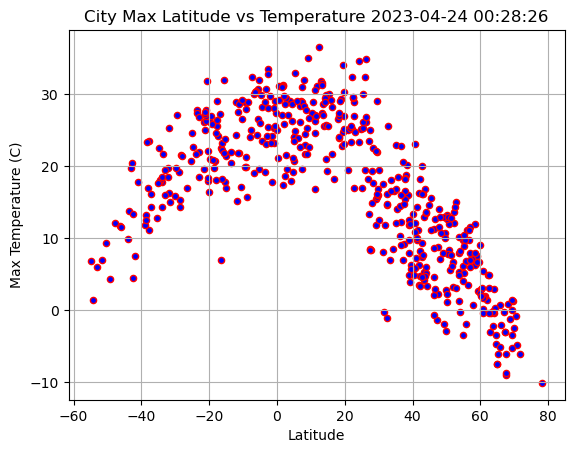

In [4]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp",c='blue', edgecolor='red')

timestamp = city_data_df.loc[1,'Date']
date = datetime.datetime.fromtimestamp(timestamp)
print(date)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature " + str(date))
plt.grid()

# Save the figure
plt.savefig("zzz_Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

2023-04-24 00:28:26


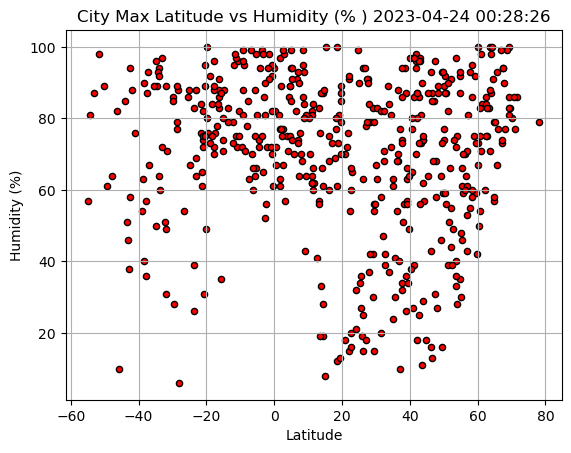

In [5]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity",c='red',edgecolor='black')

timestamp = city_data_df.loc[1,'Date']
date = datetime.datetime.fromtimestamp(timestamp)
print(date)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs Humidity (% ) " + str(date))
plt.grid()

# Save the figure
plt.savefig("zzzFig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

2023-04-24 00:28:26


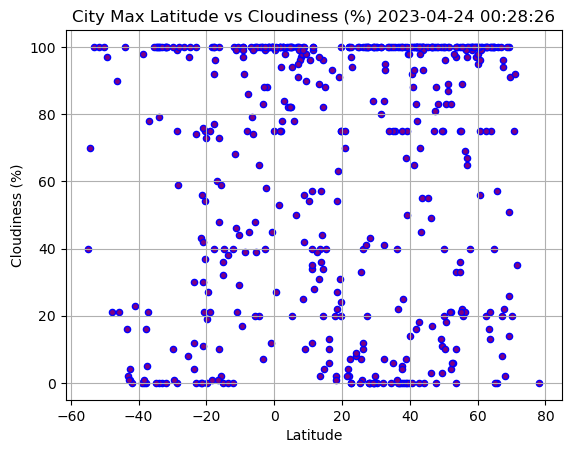

In [6]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness",c='purple',edgecolor='blue')

timestamp = city_data_df.loc[1,'Date']
date = datetime.datetime.fromtimestamp(timestamp)
print(date)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs Cloudiness (%) " + str(date))
plt.grid()


# Save the figure
plt.savefig("zzzFig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

2023-04-24 00:28:26


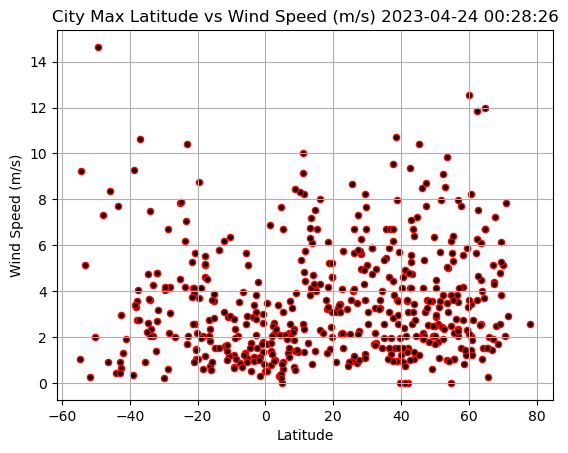

In [7]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Wind Speed",c='black',edgecolor='red')

timestamp = city_data_df.loc[1,'Date']
date = datetime.datetime.fromtimestamp(timestamp)
print(date)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs Wind Speed (m/s) " + str(date))
plt.grid()


# Save the figure
plt.savefig("zzzFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


Correlation coefficient: 0.09939680336520851
Slope: 0.007514457494387057
Intercept: 3.3329493716408143
R-value: 0.09939680336520851
P-value: 0.02565197087727057
Standard error: 0.003357510140847302


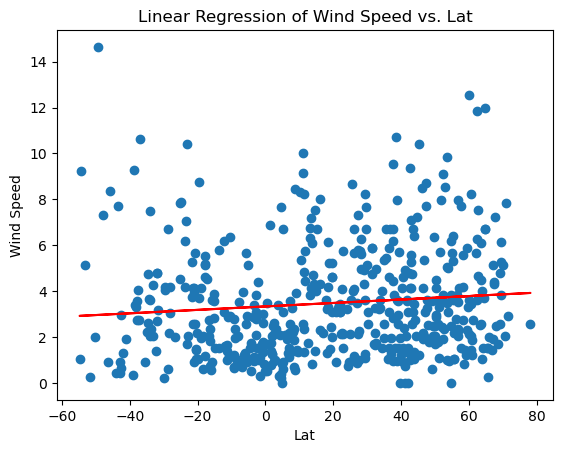

In [35]:
# Define a function to create Linear Regression plots
#*********************************************************************************************************************
#*********************************************************************************************************************
#*************NOT SURE WHAT EXACTLY IS THE QUESTION IS ASKING SO PROVIDED 2 ANSWERS***********************************
#************THE DEF LINEAR IS PROBABLY WHAT YOU ARE AFTER. ALSO HAD ISSUES WITH .STATS SO IMPORTED PEARSONR**********
#*********************************************************************************************************************
#*********************************************************************************************************************

x = city_data_df['Lat']
y = city_data_df['Wind Speed']

plt.title(f'Linear Regression of {(y.name)} vs. {(x.name)}')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x,y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
corr, _ = pearsonr(x, y)

print('Correlation coefficient:', corr)
print('Slope:', slope)
print('Intercept:', intercept)
print('R-value:', rvalue)
print('P-value:', pvalue)
print('Standard error:', stderr)  

# def linear_regression(city_data_df, x, y):
#     # Extract the x-axis and y-axis data from the DataFrame
##     x = city_data_df[x]
##     y = city_data_df[y]

#     # slope, intercept, correlation coefficient, and p-value for linear regression
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#     plt.scatter(x, y)
#     plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
#     plt.title(f'Linear Regression of {y} vs. {x}')
#     plt.xlabel(x)
#     plt.ylabel(y)
#     plt.show()

  

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-0.15,100,100,2.57,CA,1682310506
2,flin flon,54.7682,-101.8650,-3.38,92,36,2.48,CA,1682310506
3,kanoya,31.3833,130.8500,17.54,58,100,5.88,JP,1682310506
5,kodiak,57.7900,-152.4072,0.73,55,100,7.72,US,1682310507
8,iskateley,67.6803,53.1512,-6.07,90,22,7.25,RU,1682310508


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,6.06,87,100,5.14,CL,1682310506
4,san matias,-16.3667,-58.4000,22.53,88,48,0.72,BO,1682310507
6,grytviken,-54.2811,-36.5092,1.36,81,70,9.24,GS,1682310507
7,vila velha,-20.3297,-40.2925,22.19,89,75,1.03,BR,1682310507
10,port-aux-francais,-49.3500,70.2167,4.34,61,97,14.64,TF,1682310508


###  Temperature vs. Latitude Linear Regression Plot

R-value: -0.8726312327363627


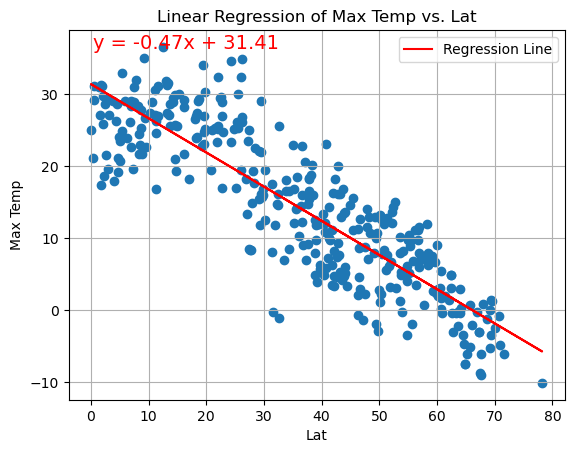

In [56]:
# Linear regression on Northern Hemisphere


x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

plt.title(f'Linear Regression of {(y.name)} vs. {(x.name)}')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x,y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
corr, _ = pearsonr(x, y)
plt.legend()
plt.grid()


#plt.text(min(x), max(y)-5, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)
formula_y = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(formula_y, xy=(0.05, 0.95), xycoords='axes fraction',color='red',fontsize=14)



print('R-value:', rvalue)
#print('P-value:', pvalue)
#print('Standard error:', stderr)
#print('Correlation coefficient:', corr)
#print('Slope:', slope)
#print('Intercept:', intercept)

R-value: 0.724611664585392


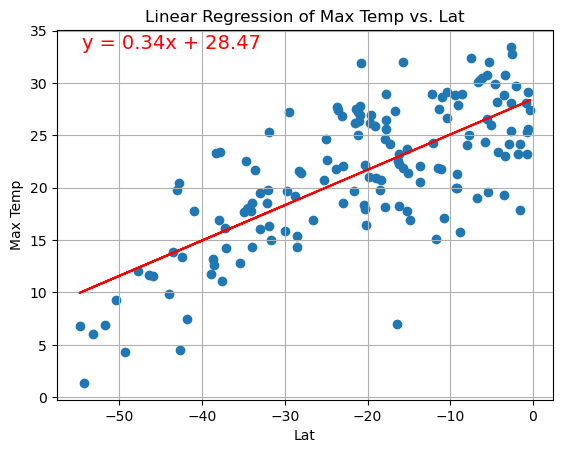

In [57]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

plt.title(f'Linear Regression of {(y.name)} vs. {(x.name)}')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x,y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
corr, _ = pearsonr(x, y)
plt.grid()
#plt.legend()


#plt.text(min(x), max(y)-5, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)
formula_y = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(formula_y, xy=(0.05, 0.95), xycoords='axes fraction',color='red',fontsize=14)



print('R-value:', rvalue)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-value: 0.034448799800358455


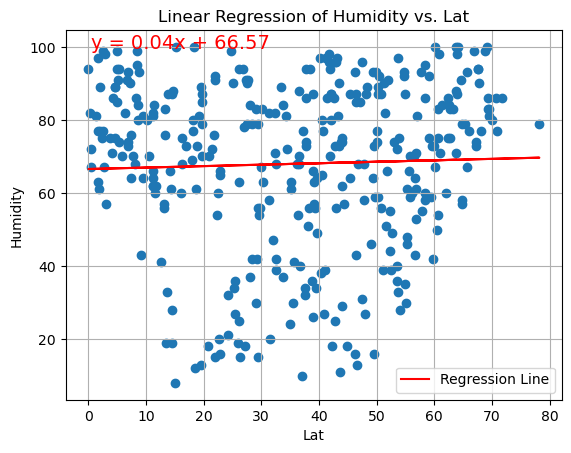

In [58]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

plt.title(f'Linear Regression of {(y.name)} vs. {(x.name)}')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x,y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
corr, _ = pearsonr(x, y)
plt.legend()
plt.grid()


#plt.text(min(x), max(y)-5, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)
formula_y = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(formula_y, xy=(0.05, 0.95), xycoords='axes fraction',color='red',fontsize=14)



print('R-value:', rvalue)



R-value: 0.23851586256232674


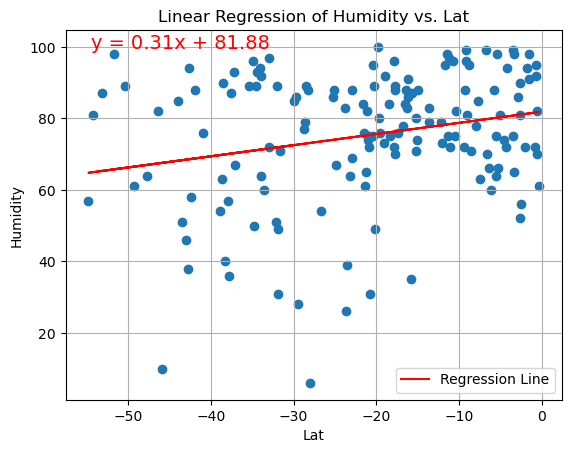

In [59]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

plt.title(f'Linear Regression of {(y.name)} vs. {(x.name)}')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x,y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
corr, _ = pearsonr(x, y)
plt.legend()
plt.grid()

#plt.text(min(x), max(y)-5, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)
formula_y = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(formula_y, xy=(0.05, 0.95), xycoords='axes fraction',color='red',fontsize=14)



print('R-value:', rvalue)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-value: 0.007139155669626938


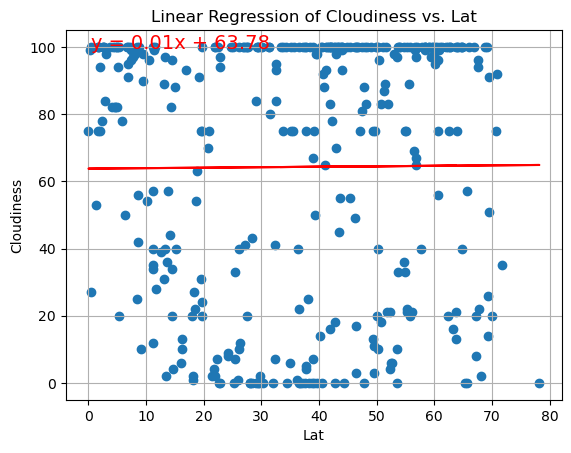

In [60]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

plt.title(f'Linear Regression of {(y.name)} vs. {(x.name)}')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x,y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
corr, _ = pearsonr(x, y)
#plt.legend()
plt.grid()


#plt.text(min(x), max(y)-5, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)
formula_y = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(formula_y, xy=(0.05, 0.95), xycoords='axes fraction',color='red',fontsize=14)



print('R-value:', rvalue)

R-value: 0.19546159360484583


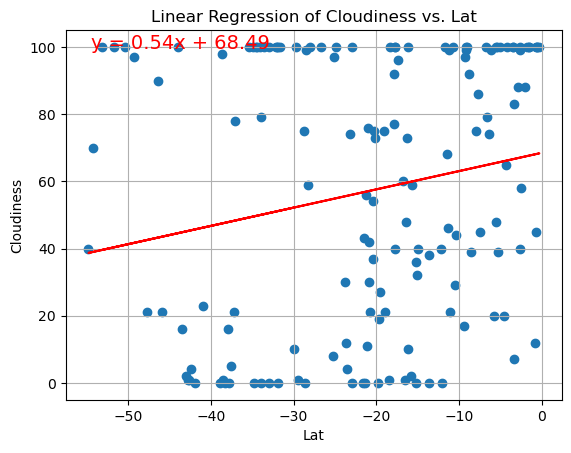

In [61]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

plt.title(f'Linear Regression of {(y.name)} vs. {(x.name)}')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x,y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
corr, _ = pearsonr(x, y)
#plt.legend()
plt.grid()


#plt.text(min(x), max(y)-5, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)
formula_y = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(formula_y, xy=(0.05, 0.95), xycoords='axes fraction',color='red',fontsize=14)



print('R-value:', rvalue)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-value: 0.13013381605315982


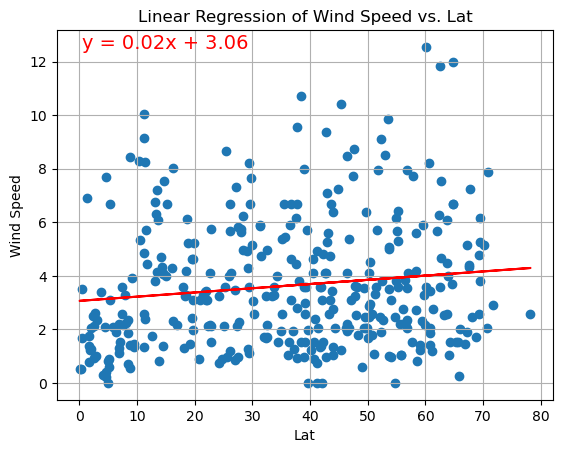

In [62]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

plt.title(f'Linear Regression of {(y.name)} vs. {(x.name)}')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x,y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
corr, _ = pearsonr(x, y)
#plt.legend()
plt.grid()

#plt.text(min(x), max(y)-5, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)
formula_y = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(formula_y, xy=(0.05, 0.95), xycoords='axes fraction',color='red',fontsize=14)



print('R-value:', rvalue)


R-value: -0.28842372871815486


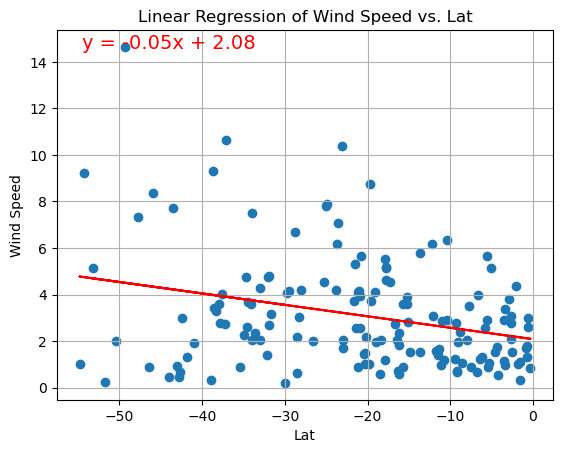

In [63]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

plt.title(f'Linear Regression of {(y.name)} vs. {(x.name)}')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x,y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Regression Line')
corr, _ = pearsonr(x, y)
#plt.legend()
plt.grid()

#plt.text(min(x), max(y)-5, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12)
formula_y = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(formula_y, xy=(0.05, 0.95), xycoords='axes fraction',color='red',fontsize=14)



print('R-value:', rvalue)

**Discussion about the linear relationship:** YOUR RESPONSE HERE